In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [3]:
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
x = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

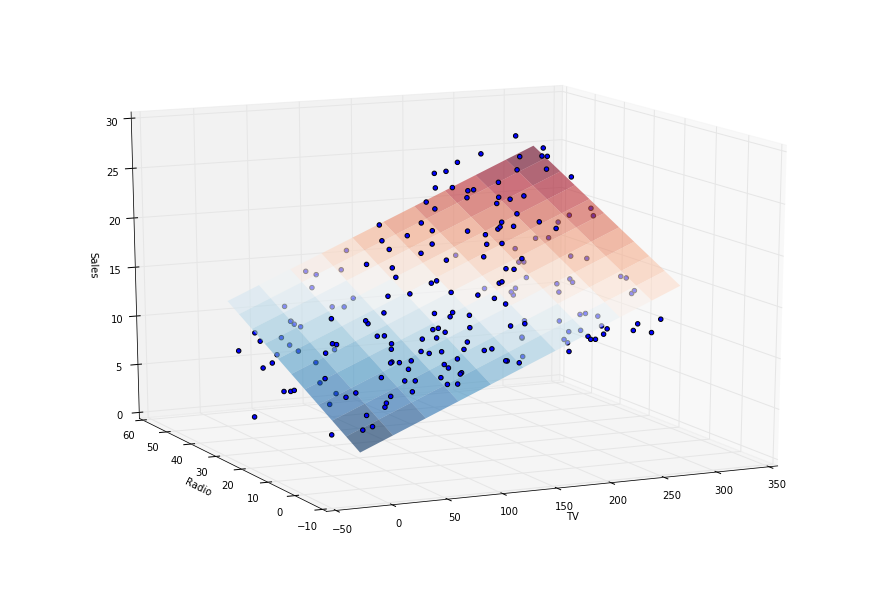

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

In [9]:
X = sm.add_constant(x)

In [10]:
est = sm.OLS(y,X).fit()

In [11]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 01 May 2016   Prob (F-statistic):           4.83e-98
Time:                        10:12:44   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
import statsmodels.formula.api as smf

est = smf.ols(formula='Sales~TV + Radio', data=df_adv).fit()

In [18]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 01 May 2016   Prob (F-statistic):           4.83e-98
Time:                        10:14:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
df2 = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)
df2['famhist_ord'] = pd.Categorical(df2.famhist).codes

In [33]:
X=df2.copy()
y=X.pop('chd')

In [34]:
df2.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,famhist_ord
row.names,,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,0
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1


In [35]:
y.head()

row.names
1    1
2    1
3    0
4    1
5    1
Name: chd, dtype: int64

In [36]:
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,famhist_ord
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,0
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,1
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [39]:
est = smf.ols(formula="chd ~ famhist_ord", data=df2).fit()

In [40]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Sun, 01 May 2016   Prob (F-statistic):           2.66e-09
Time:                        11:36:42   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.2370      0.028      8.489      0.000         0.182     0.292
famhist_ord     0.2630      0.043      6.071      0.000         0.178     0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels'
                 '/master/statsmodels/datasets/randhie/src/randhie.csv')

In [62]:
df['logincome'] = np.log1p(df.income)
data=df[['mdvis','hlthp','logincome']]


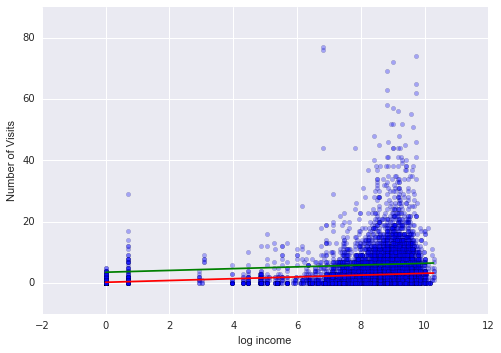

In [72]:
import seaborn as sns
plt.scatter(data.logincome, data.mdvis, alpha=.3)
plt.xlabel('log income')
plt.ylabel('Number of Visits')

income_linspace = np.linspace(data.logincome.min(), data.logincome.max(), 100)
est = smf.ols(formula='mdvis~hlthp+logincome', data=data).fit()

plt.plot(income_linspace, est.params[0] + est.params[2] * income_linspace + est.params[1] * 0, 'r')
plt.plot(income_linspace, est.params[0] + est.params[2] * income_linspace + est.params[1] * 1, 'g')


In [73]:
est.params

Intercept    0.272485
hlthp        3.277808
logincome    0.291552
dtype: float64

In [65]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mdvis   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 01 May 2016   Prob (F-statistic):           9.36e-57
Time:                        12:16:03   Log-Likelihood:                -58906.
No. Observations:               20190   AIC:                         1.178e+05
Df Residuals:                   20187   BIC:                         1.178e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2725      0.227      1.200      0.230        -0.173     0.718
hlthp          3.2778      0.261     12.566      0.000         2.767     3.789
logincome      0.2916      0.026     11.310      0.000         0.241     0.342
==============================================================================
Omnibus:                    20183.191   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1579001.221
Skew:                           4.835   Prob(JB):                         0.00
Kurtosis:                      45.231   Cond. No.                         74.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

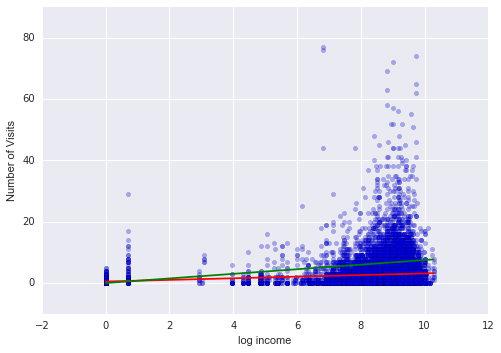

In [78]:
plt.scatter(data.logincome, data.mdvis, alpha=.3)
plt.xlabel('log income')
plt.ylabel('Number of Visits')

income_linspace = np.linspace(data.logincome.min(), data.logincome.max(), 100)
est = smf.ols(formula='mdvis~hlthp*logincome', data=data).fit()
plt.plot(income_linspace, est.params[0] + est.params[2] * income_linspace + est.params[1] * 0 +  est.params[3] * 0 * income_linspace
, 'r')
plt.plot(income_linspace, est.params[0] + est.params[2] * income_linspace + est.params[1] * 1 + est.params[3] * 1 * income_linspace, 'g')


In [85]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mdvis   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     93.21
Date:                Sun, 01 May 2016   Prob (F-statistic):           6.57e-60
Time:                        14:17:11   Log-Likelihood:                -58896.
No. Observations:               20190   AIC:                         1.178e+05
Df Residuals:                   20186   BIC:                         1.178e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.5217      0.234      2.231      0.026         0.063     0.980
hlthp              -0.4991      0.890     -0.561      0.575        -2.243     1.245
logincome           0.2630      0.027      9.902      0.000         0.211     0.315
hlthp:logincome     0.4868      0.110      4.441      0.000         0.272     0.702
==============================================================================
Omnibus:                    20177.925   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1578257.654
Skew:                           4.832   Prob(JB):                         0.00
Kurtosis:                      45.222   Cond. No.                         252.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')

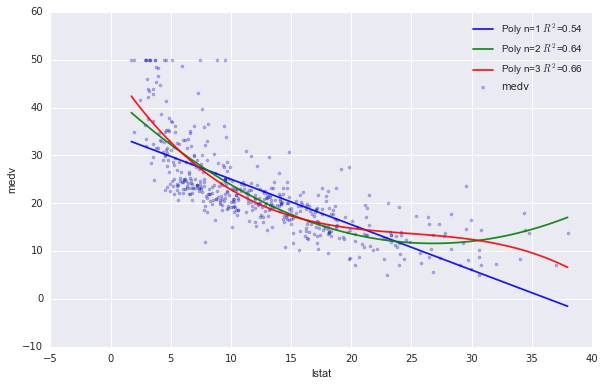

In [84]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})
# 1-st order polynomial
poly_1 = smf.ols(formula='medv ~ 1 + lstat', data=df).fit()
plt.plot(x.lstat, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0)', data=df).fit()
plt.plot(x.lstat, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data=df).fit()
plt.plot(x.lstat, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()